In [28]:
## Importing Necessary Libraries
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [29]:
## Hyperparameters

EPOCHS = 5
BATCH_SIZE = 8

LEARNING_RATE = 0.001
MOMENTUM = 0.9

In [30]:
## Loading all Data

transformations = transforms.Compose([
        transforms.ToTensor(), # Convert PIL image to tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize the tensor
])

training_set= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transformations)
training_loader = torch.utils.data.DataLoader(training_set, batch_size=BATCH_SIZE, shuffle=True)

test_set= torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transformations)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [31]:
## Defining the Neural Network

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        ## Pooling Layer
        self.pooling = nn.MaxPool2d(2,2) # Defines the pooling layer for the CNN

        ## Convolutional Layers
        # Note: Input Channels = 3 for RGB images
        self.convolutional_layer1 = nn.Conv2d(3, 8, 5) ##First convolutional layer
        self.convolutional_layer2 = nn.Conv2d(8, 16, 5) ##Second convolutional layer

        ## Dense Layers
        self.Dense1 = nn.Linear(16*5*5, 120) ##First Dense layer
        self.Dense2 = nn.Linear(120, 84) ##Second Dense layer
        self.Dense3 = nn.Linear(84, 10) ##Third Dense layer
        # Note: Output Channels = 10 for 10 classes


    def forward(self, x):

        ## Forward Propagation
        x = self.pooling(F.relu(self.convolutional_layer1(x)))
        x = self.pooling(F.relu(self.convolutional_layer2(x)))

        ## Flatten the vector so it can be applied to the Dense layers
        x = torch.flatten(x, 1)
        
        x = F.relu(self.Dense1(x))
        x = F.relu(self.Dense2(x))
        x = self.Dense3(x)
        
        return x

myNetwork = CNNModel()

In [32]:
## Loss Function and Optimizer

loss_function = nn.CrossEntropyLoss() # Defines the loss function
optimizer = optim.SGD(myNetwork.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM) # Defines the optimizer

In [33]:
## Training the Network

training_losses = []
training_accuracies = []

for epoch in range(EPOCHS):

    ## Running loss in a single epoch of training 
    epoch_loss = 0.
    correct = 0.
    total = 0

    for i, data in enumerate(training_loader,0):

        ## Extracting inputs and labels from the data
        inputs, labels = data

        ## Zeroing the gradients
        optimizer.zero_grad()

        initial_outputs = myNetwork(inputs) # Forward Propagation

        predictions = torch.argmax(initial_outputs, dim=1) # Extracting the predictions
        correct +=  (predictions == labels).sum().item() # Calculating the number of correct predictions
        total += labels.size(0) # Calculating the total number of predictions

        loss = loss_function(initial_outputs, labels) # Calculating the loss
        loss.backward() # Backward Propagation
        optimizer.step() # Updating the weights

        ## Updating the loss for each batch
        epoch_loss += loss.item()
    
    ## Printing the loss for each epoch
    print(f'Epoch {epoch+1} of {EPOCHS}   Accuracy: {correct* 100/ total}%  Loss: {epoch_loss/len(training_loader)}')

    ## Tracking Loss and Accuracy for each epoch 
    training_losses.append(epoch_loss/len(training_loader))
    training_accuracies.append(correct* 100/ total)

Epoch 1 of 5   Accuracy: 31.91%  Loss: 1.8285659185504914
Epoch 2 of 5   Accuracy: 49.868%  Loss: 1.3833079930210113
Epoch 3 of 5   Accuracy: 56.47%  Loss: 1.2140508589816092
Epoch 4 of 5   Accuracy: 60.706%  Loss: 1.1064625477266312
Epoch 5 of 5   Accuracy: 63.844%  Loss: 1.0228194849479197


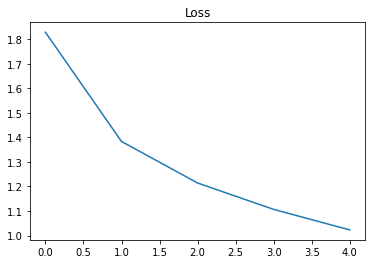

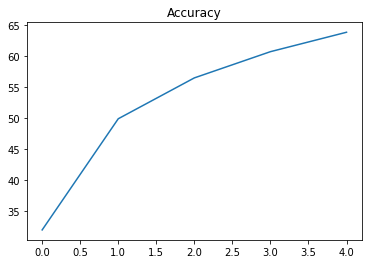

In [35]:
import matplotlib.pyplot as plt

## Plotting the Loss and Accuracy

plt.plot(training_losses)
plt.title('Loss')
plt.show()

plt.plot(training_accuracies)
plt.title('Accuracy')
plt.show()

In [36]:
## Testing the Network

correct = 0.
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = myNetwork(images)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f'Accuracy of the network on the test images: {correct* 100/ total}%')

Accuracy of the network on the test images: 61.66%
